# 모두의 데이터분석 with 파이썬
## Unit 11. 대중교통 데이터 시각화하기

In [8]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)

for row in data:
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['21-Mar', '1호선', '1', '서울역', '937177 ', '881217 ', '166618 ', '156515 ']
['21-Mar', '1호선', '10', '동묘앞', '125653 ', '136688 ', '146045 ', '148410 ']
['21-Mar', '1호선', '2', '시청', '468162 ', '470800 ', '63279 ', '61083 ']
['21-Mar', '1호선', '3', '종각', '764393 ', '731560 ', '113573 ', '106197 ']
['21-Mar', '1호선', '4', '종로3가', '428232 ', '386982 ', '265195 ', '248906 ']
['21-Mar', '1호선', '5', '종로5가', '361954 ', '366486 ', '242782 ', '235207 ']
['21-Mar', '1호선', '6', '동대문', '209266 ', '198048 ', '109645 ', '108687 ']
['21-Mar', '1호선', '7', '신설동', '267910 ', '266267 ', '105436 ', '102204 ']
['21-Mar', '1호선', '8', '제기동', '229143 ', '223026 ', '255603 ', '271115 ']
['21-Mar', '1호선', '9', '청량리(서울시립대입구)', '325003 ', '322189 ', '247560 ', '247326 ']
['21-Mar', '2호선', '11', '시청', '531959 ', '512059 ', '44864 ', '40331 ']
['21-Mar', '2호선', '12', '을지로입구', '892469 ', '909207 ', '85020 ', '80260 ']
['21-Mar', '2호선', '13', '을지로3가', '468651 ',

## 유임 승차 비율이 가장 높은 역 찾기

In [11]:
# 데이터를 읽어온다.
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
# 모든 역의 데이터를 바탕으로 각 역의 비율(유임승차인원 / 무임승차인원)을 계산한다.
for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0 :
        rate = row[4] / row[6]
        if rate > mx :           # 비율이 가장 높은 역을 찾는다.
            mx = rate
            print(row, round(rate, 2))
print(mx)
# 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다.

['21-Mar', '1호선', '1', '서울역', 937177, 881217, 166618, 156515] 5.62
['21-Mar', '1호선', '2', '시청', 468162, 470800, 63279, 61083] 7.4
['21-Mar', '2호선', '11', '시청', 531959, 512059, 44864, 40331] 11.86
['21-Mar', '2호선', '19', '한양대', 193835, 208854, 10566, 11351] 18.35
18.345163732727617


In [12]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = 0
rate = 0
mx_station = ''

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',',''))
    if row[6] != 0 and (row[4]+row[6]) > 100000 :
        rate = row[4] / row[6]
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1]
print(mx_station, round(mx*100,2))

한양대 2호선 1834.52


## 유무임 승하차 인원이 가장 많은 역은 어디일까?

In [22]:
# 데이터를 읽어온다.
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
mx = [0] * 4
mx_station = [0] * 4

# 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + " " + row[1]
# 각각의 인원이 가장 많은 역을 출력한다.
for i in range(4) :
    print(label[i]+' : ' +mx_station[i], mx[i])

유임승차 : 강남 2호선 2079868
유임하차 : 강남 2호선 2062016
무임승차 : 종로3가 1호선 265195
무임하차 : 제기동 1호선 271115


## 모든 역의 유무임 승하차 비율을 파이 차트로 나타내기

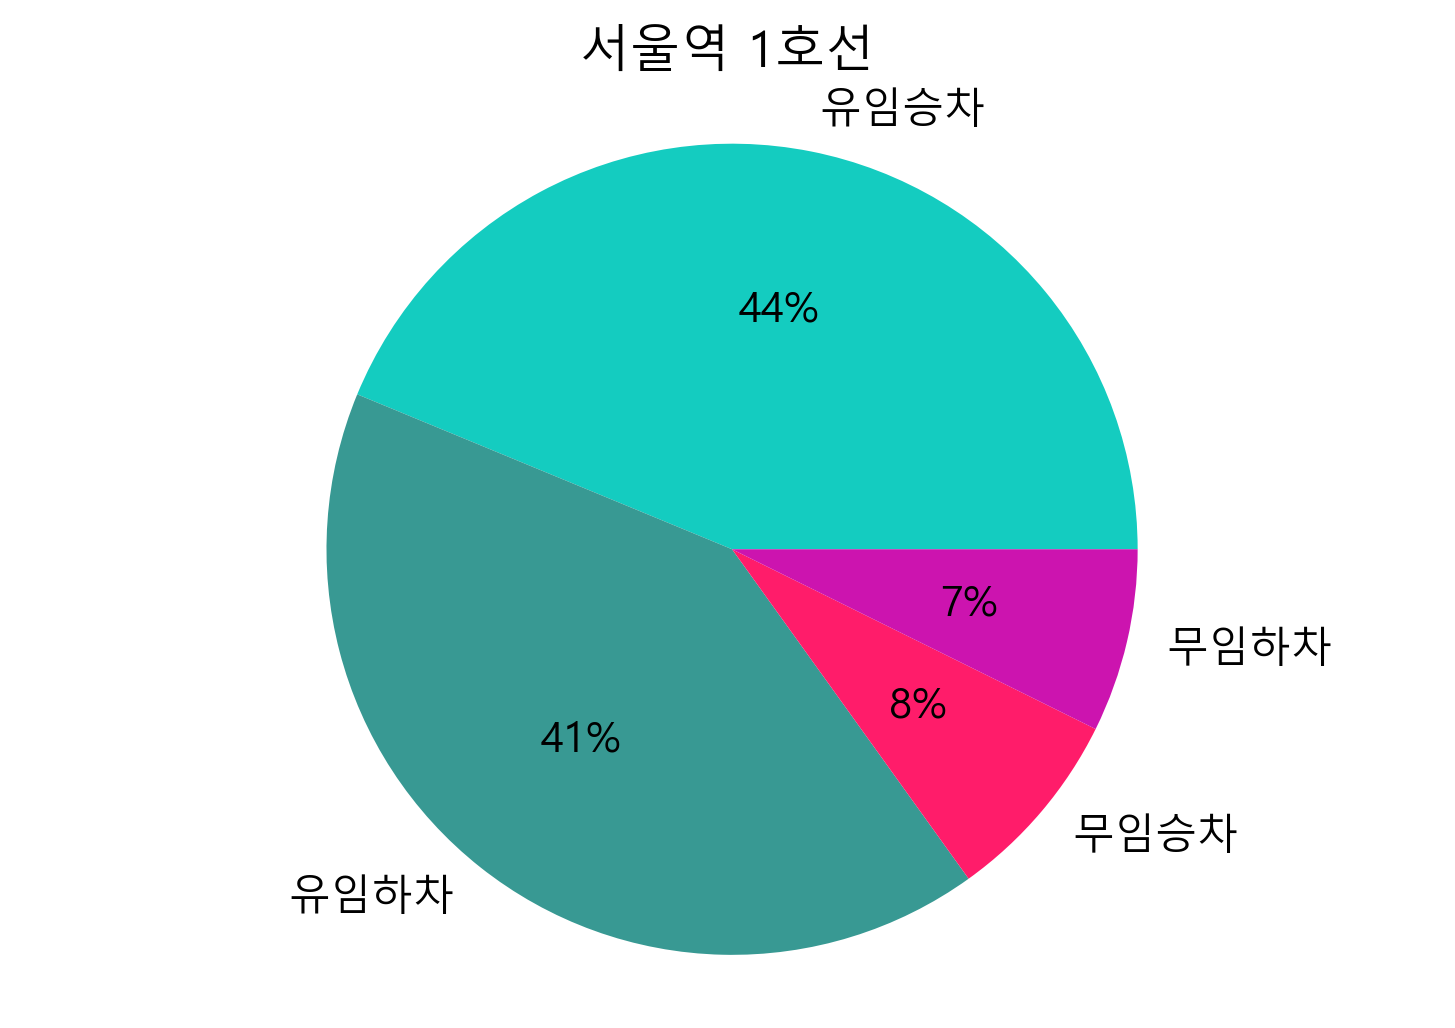

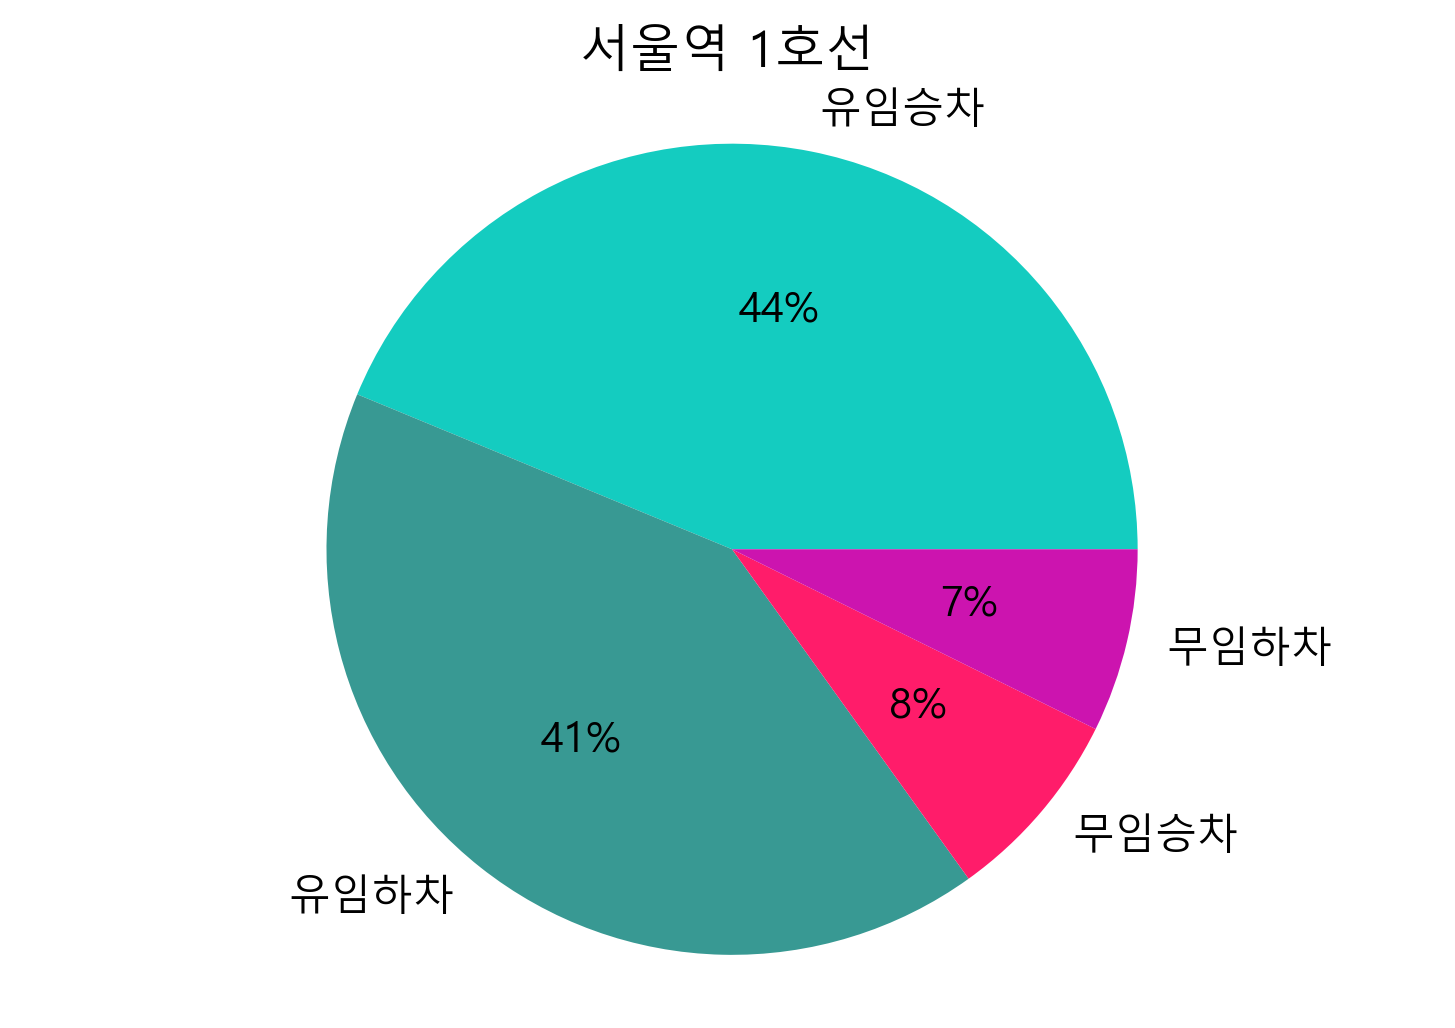

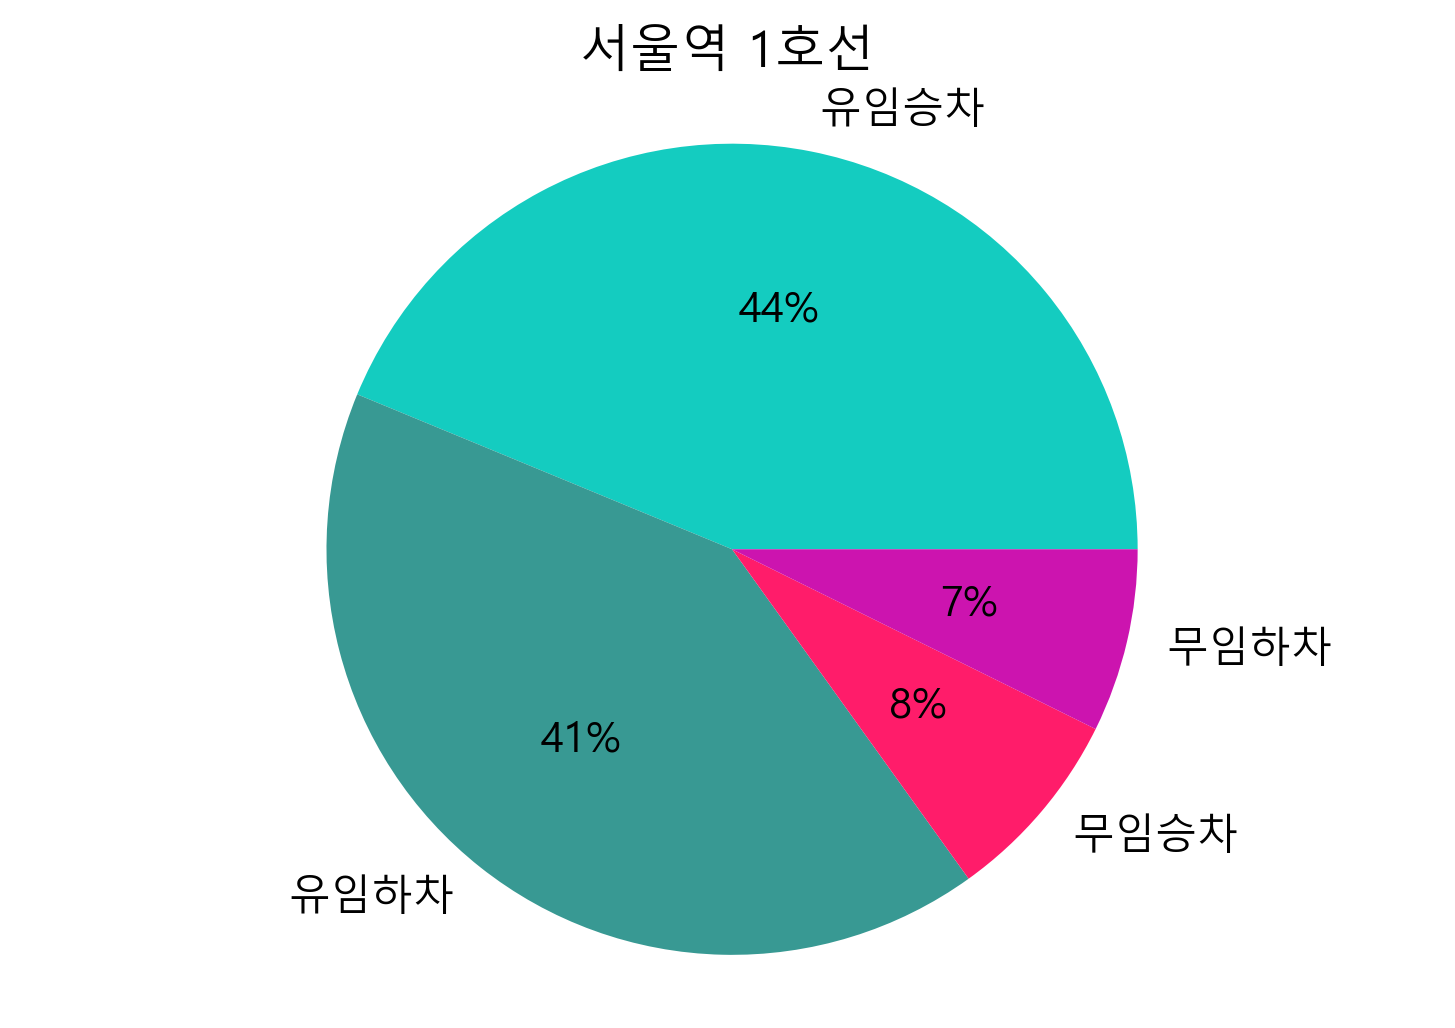

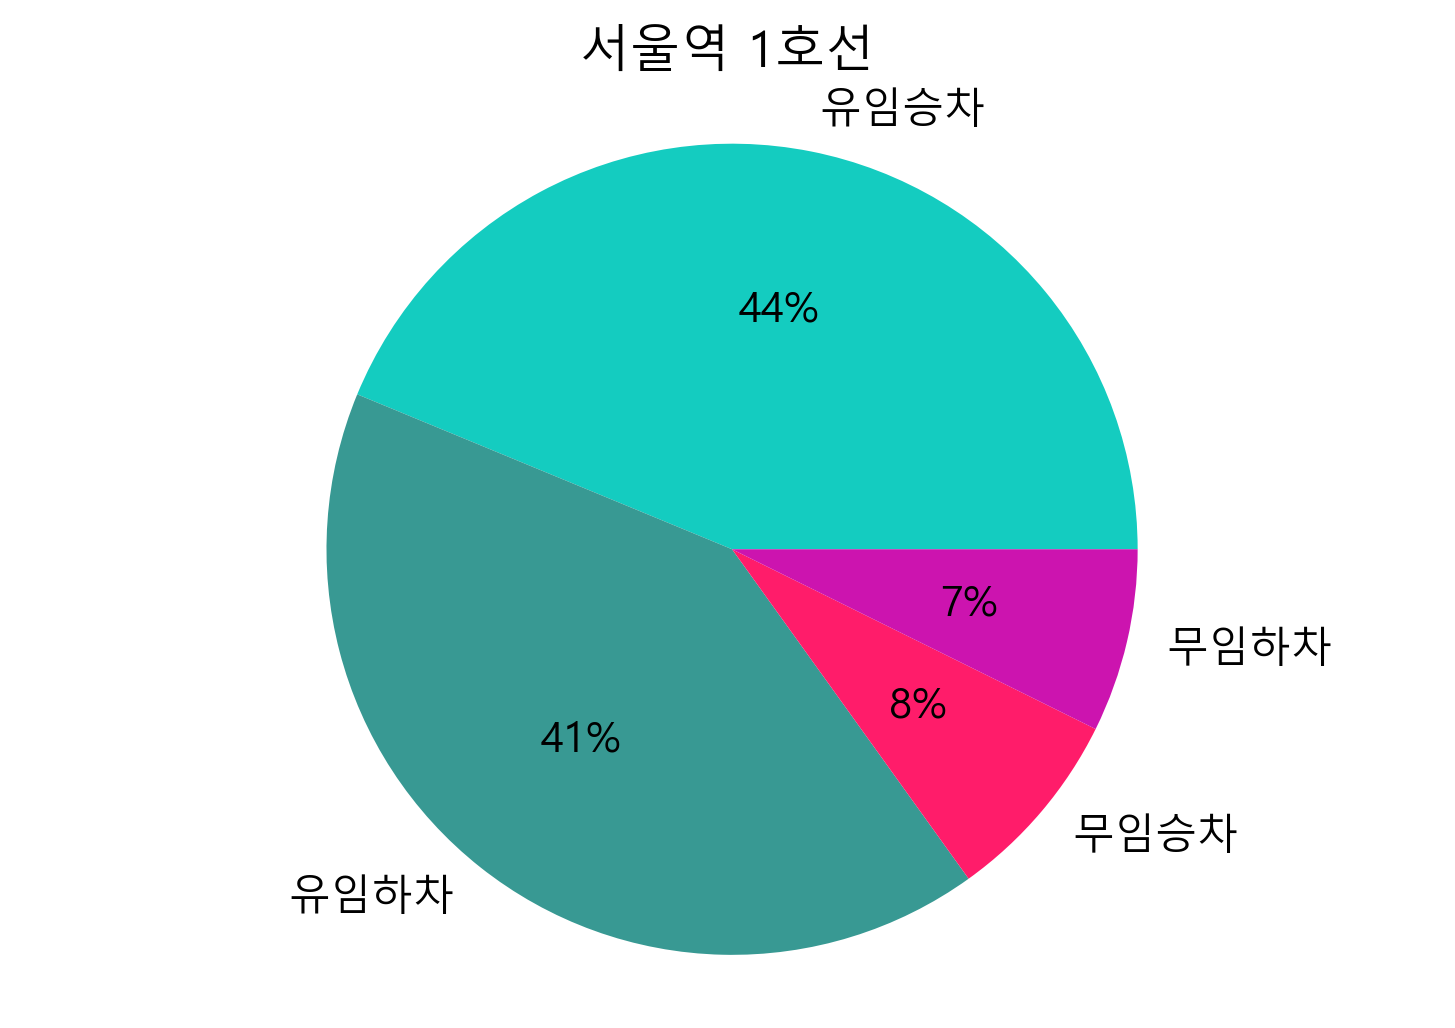

KeyboardInterrupt: 

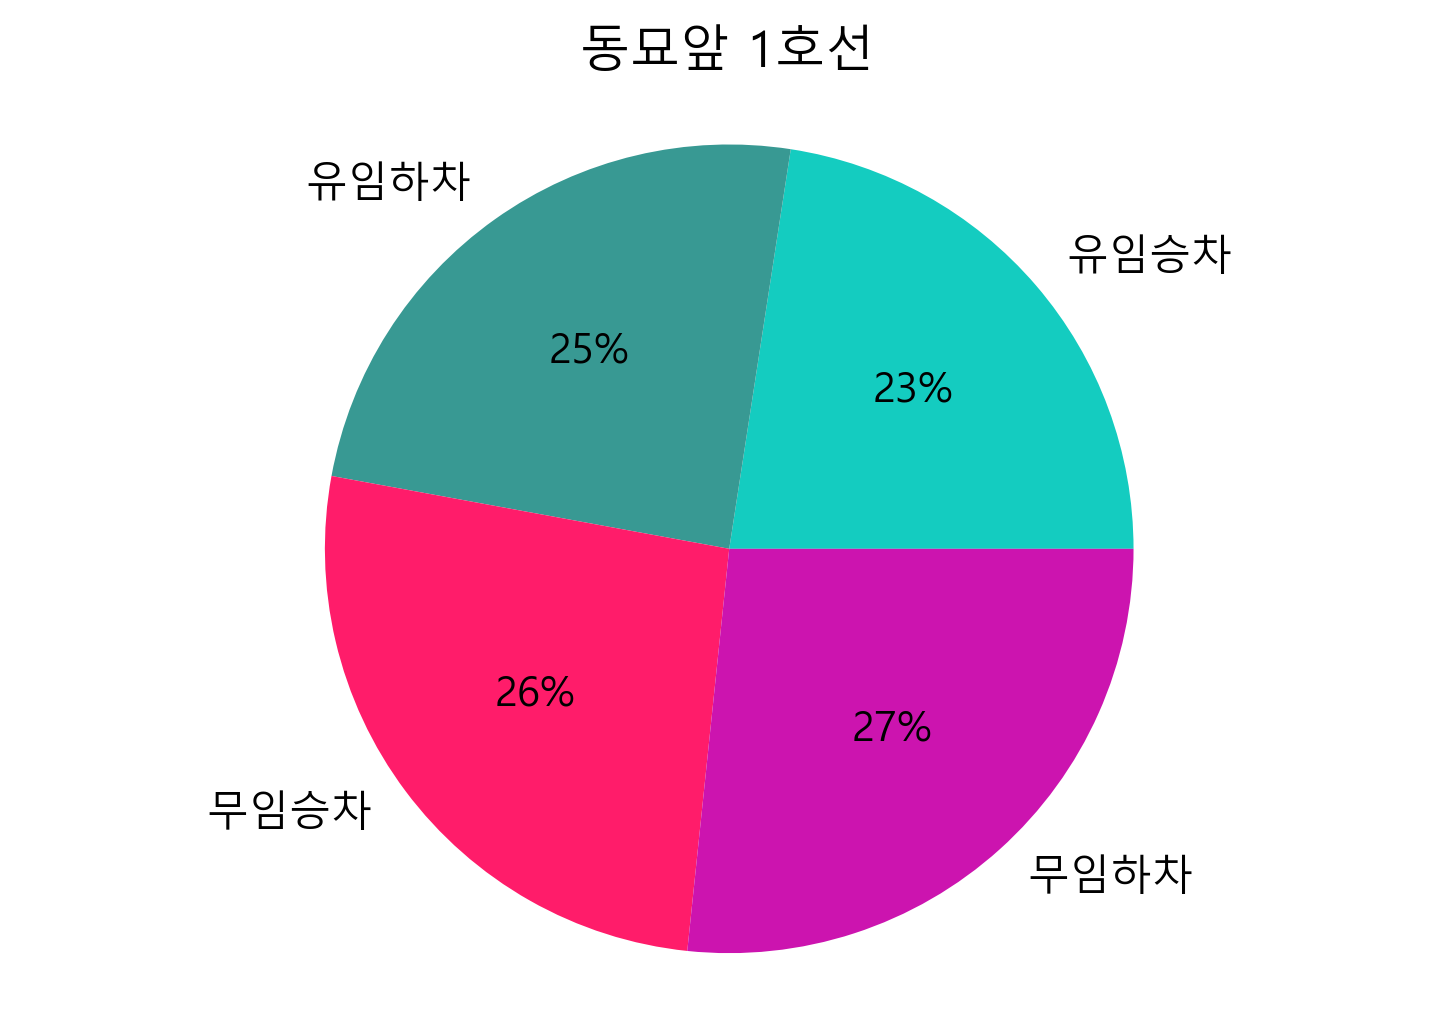

In [26]:
import csv
import matplotlib.pyplot as plt
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family='Malgun Gothic')

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',',''))        
        plt.figure(dpi=300)
        plt.title(row[3]+ ' ' + row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
        plt.axis('equal')
        plt.savefig(row[3]+' '+row[1]+'.png')
        plt.show()